In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN 

In [2]:
path = "PTSD.xlsx"
df = pd.read_excel(path)
df = df[~df["PCL_Strict3"].isna()]
original_features = ["age", "highschool_diploma",  "dyslexia", "ADHD", "T1Acc1t", "T1Acc1n", "T1bias", "phq1", "lot1", "trait1",
               "state1", "PCL1",  "PCL_Broad1", "PCL_Strict1", "phq2", "lot2", "trait2", "state2", "PCL2", "PCL_Broad2", 
                 "PCL_Strict2", "cd_risc1", "active_coping1", "planning1", "positive_reframing1", "acceptance1", "humor1",
                 "religion1", "emotional_support1","instrumental_support1", "self_distraction1", "denial1", 
               "venting1", "substance_use1", "behavioral_disengagement1", "self_blame1", "active_coping2", "planning2",
                "positive_reframing2", "acceptance2", "humor2", "religion2", "emotional_support2", "instrumental_support2", 
                 "self_distraction2", "denial2", "venting2", "substance_use2", "behavioral_disengagement2", "self_blame2",
                 "trauma_history8_1", "HML_5HTT", "HL_MAOA", "HML_NPY", "COMT_Ranked", "COMT_Hap1_recode", 
               "COMT_Hap2_recode", "COMT_Hap1_LvsMH", "HML_FKBP5", "Ashken_scale", "Sephar_scale", "Unknown"]


In [3]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[original_features] = imp.fit_transform(df[original_features])

ss = StandardScaler()
df[original_features] = ss.fit_transform(df[original_features])



In [4]:
pca = PCA(n_components = 1)
df["pcls"] = pca.fit_transform(df[["PCL1",  "PCL_Broad1", "PCL_Strict1"]])
df.drop(["PCL1",  "PCL_Broad1", "PCL_Strict1"], axis=1, inplace=True)
original_features.append("pcls")
original_features.remove("PCL1")
original_features.remove("PCL_Broad1")
original_features.remove("PCL_Strict1")

In [5]:
rand_item = [original_features[random.randrange(len(original_features))] for i in range(8)]
repr(rand_item)

"['trauma_history8_1', 'acceptance2', 'denial2', 'denial2', 'denial2', 'instrumental_support2', 'emotional_support2', 'HL_MAOA']"

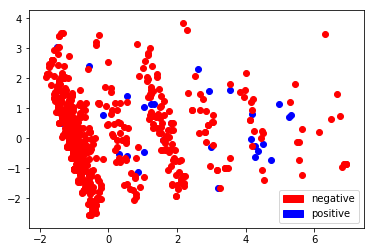

In [6]:

pca = PCA(n_components = 2)
df= df.dropna(axis=1, thresh = 0.5)
data_transformed = df[rand_item]
data_transformed = data_transformed.fillna(data_transformed.mean())
data_transformed = pca.fit_transform(data_transformed)


# blue
positive_group = data_transformed[df["PCL_Strict3"] == 1]

# red
negative_group = data_transformed[df["PCL_Strict3"] == 0]

red_patch = mpatches.Patch(color='red', label='negative')
blue_patch = mpatches.Patch(color='blue', label='positive')
plt.legend(handles=[red_patch, blue_patch])

plt.scatter(positive_group[:,0], positive_group[:,1], c='b')
plt.scatter(negative_group[:,0], negative_group[:,1], c='r')

# x = np.linspace(min(data_transformed[0]), max(data_transformed[0]), 2000)
# y = -1.7*x + 10
#plt.plot(x ,y)
plt.show()

#n = data_transformed.shape[1]

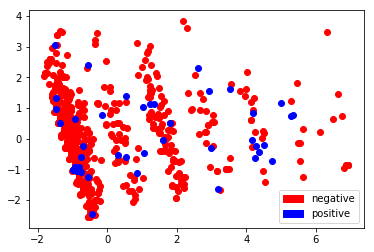

In [7]:

pca = PCA(n_components = 2)
data_transformed = pca.fit_transform(data_transformed)


# blue
positive_group = data_transformed[df["PCL_Strict3"] == 1]

# red
negative_group = data_transformed[df["PCL_Strict3"] == 0]

red_patch = mpatches.Patch(color='red', label='negative')
blue_patch = mpatches.Patch(color='blue', label='positive')
plt.legend(handles=[red_patch, blue_patch])


plt.scatter(negative_group[:,0], negative_group[:,1], c='r')
plt.scatter(positive_group[:,0], positive_group[:,1], c='b')
# x = np.linspace(min(data_transformed[0]), max(data_transformed[0]), 2000)
# y = -1.7*x + 10
#plt.plot(x ,y)
plt.show()

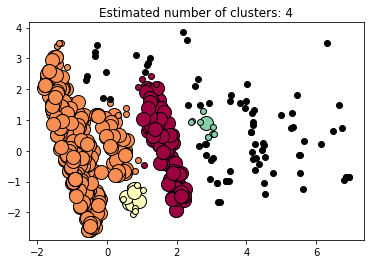

In [8]:
X = data_transformed 

# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=10, leaf_size=30).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [10]:
X.shape

(725, 2)

In [11]:
X

array([[ 1.49246085,  0.67461247],
       [ 1.8118871 ,  0.51643516],
       [ 0.3041826 , -0.53378592],
       ...,
       [-0.92272185, -0.91668185],
       [-0.96534849, -0.32311404],
       [-0.96475377, -0.20611346]])